In [17]:
import numpy as np
import matplotlib.pyplot as plt

## Study Oscillator Motion Using Newtonian Equations

In [21]:
def calc_force(x, v, k, b):
    """
    Calculate force acting ON a body due to 
    a) spring with 'stiffness' k, proportional to displacement x
    b) friction/resistance proportional to velocity v
    """
    
    Fspring = -k*x  # Hooke's law
    Ffriction = -b*v  # simple air-resistance
    F = Fspring + Ffriction
    
    return F

In [20]:
def delta_x(delta_t, v):
    """
    Calculate the tiny change in position.
    """
    dx = v * delta_t
    return dx

In [30]:
def delta_v(delta_t, x, v, k, b, m):
    """
    Calculate small change of velocity
    """
    f = calc_force(x, v, k, b)
    a = f / m  # Newton's second law f = ma
    dv = a * delta_t
    return dv

In [23]:
b = 0.0  # the coefficient of friction, leads to losses

m = 1.0 ## 1 kilogram mass
k = 10.0  # 10 N / m spring constant

As a start, we will stretch the spring and let it go without imparting any momenum (or velocity)

In [24]:
x0 = 0.2  # stretch by 20cm
p0 = 0.0  # p = mv, no initial velocity
v0 = p0 / m

In [25]:
delta_t = 1e-4  # one time step, in seconds. Eyblink is about 0.03s.

In [26]:
t_final = 10  # we study motion for t_final seconds
N = int(t_final / delta_t)

In [27]:
# at t=0 we have only initial values for the state components -- (x, v) or (x, p)
# tables of values for time, position, velocity, and momentum
ts = [0]
xs = [x0]
vs = [v0]
ps = [p0]

In [31]:
# We now will go step-by-step 
for i in range(1, N):
    
    t_old = ts[-1]  # [-1] takes the last element from the table/list, [1] -- the first.
    x_old = xs[-1]
    p_old = ps[-1]
    v_old = vs[-1]
    
    t_new = t_old + delta_t
    x_new = x_old + delta_x(delta_t, v_old)
    v_new = v_old + delta_v(delta_t, x_old, v_old, k, b, m)
    p_new = m * v_new
    
    # save the new time, position, velocity, and momentum so that we can advance again
    ts.append(t_new)
    xs.append(x_new)
    vs.append(v_new)
    ps.append(p_new)

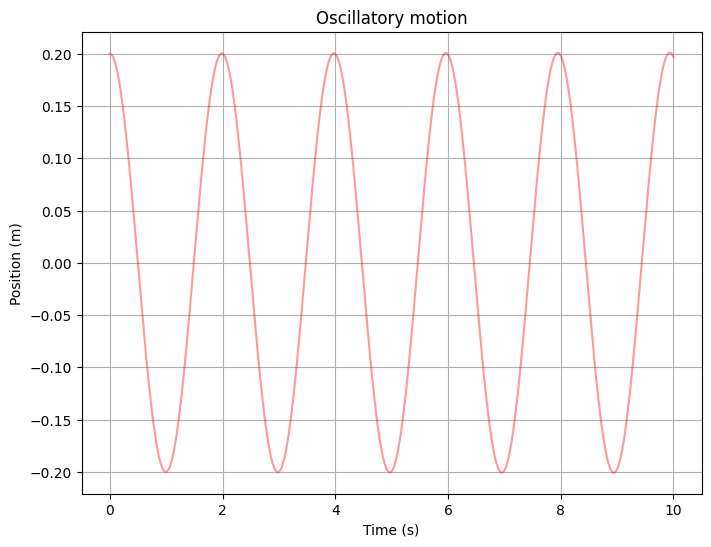

In [32]:
# Let's plot the results
# First, how position changes in time

plt.figure(figsize=[8,6])

plt.plot(ts, xs, 'r-', alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Oscillatory motion")

plt.grid(1)
plt.show()
plt.close()


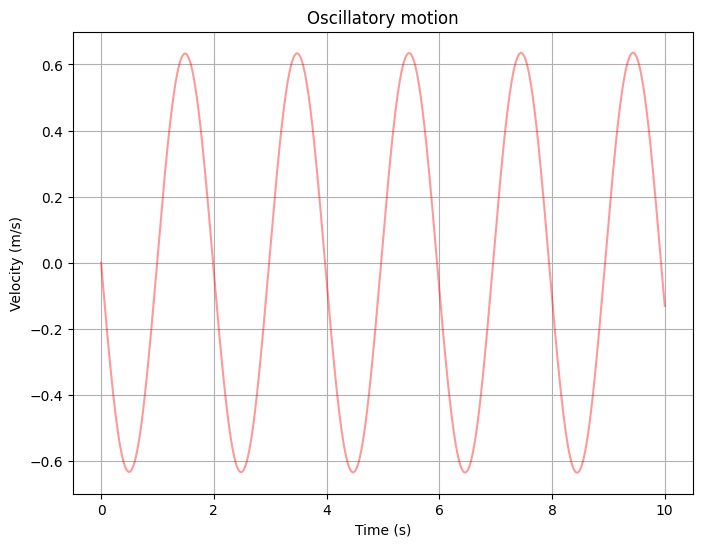

In [33]:
# Next, how velocity changes in time

plt.figure(figsize=[8,6])

plt.plot(ts, vs, 'r-', alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Oscillatory motion")

plt.grid(1)
plt.show()
plt.close()

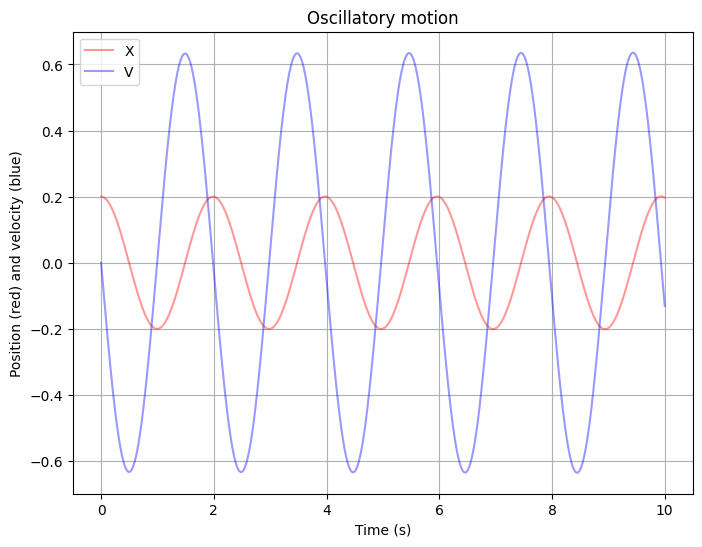

In [35]:
# Let's overlap position vs time and velocity vs time

plt.figure(figsize=[8,6])

plt.plot(ts, xs, 'r-', alpha=0.4, label="X")  # position, red curve
plt.plot(ts, vs, 'b-', alpha=0.4, label="V")  # velocity, blue curve

plt.xlabel("Time (s)")
plt.ylabel("Position (red) and velocity (blue)")
plt.title("Oscillatory motion")
plt.legend(loc="upper left")

plt.grid(1)
plt.show()
plt.close()



## Phase Space Representation of Motion (x, p)

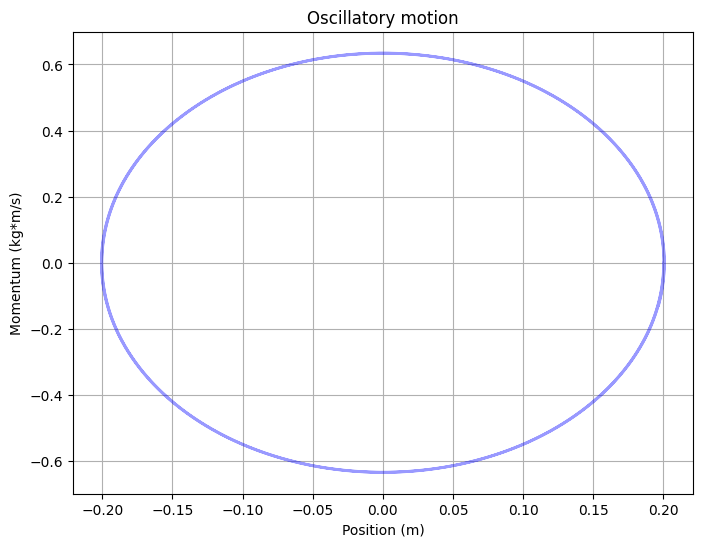

In [36]:
plt.figure(figsize=[8,6])

plt.plot(xs, ps, 'b-', alpha=0.4)
plt.xlabel("Position (m)")
plt.ylabel("Momentum (kg*m/s)")
plt.title("Oscillatory motion")

plt.grid(1)
plt.show()
plt.close()

## Using more advanced summation technique Runge-Kutta method

### Runge-Kutta method implementation. Details are not important, it is just an advanced summation.

In [44]:
def rungekutta4(f, y0, t, args=()):
    """
    Implements advanced summation technique.
    The function f is summed over time axis t 
    y0 is the initial value (e.g., x0, v0).

    The function f computes the rates of change of each variable that 
    changes: (del_t x) and (del_t) v for Newtonian mechanics.
    """
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    for i in range(n - 1):
        h = t[i+1] - t[i]  # step size, h = delta_t
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [45]:
def update_func(y, t, k, b, m):
    """
    Function that calculates the changes of the variables y=(x,v).
    d_t x = y[1]
    d_t v = y
    """
    x = y[0]
    v = y[1]

    f = -k*x-b*v  # calculate force

    # calculate rate of change
    del_t_x = v  # v
    del_t_v = f / m
    
    return np.array([del_t_x, del_t_v])

In [46]:
ts = np.linspace(0, 10, 100)  # time table, from 0 to 10, 100 steps

# now find the solution using Runge-Kutta 4th order method
# arguments in args represent the physical parameters for spring constant, mass, and air resistance
rk_soln = rungekutta4(update_func, [x0, v0], ts, args=(k, b, m))

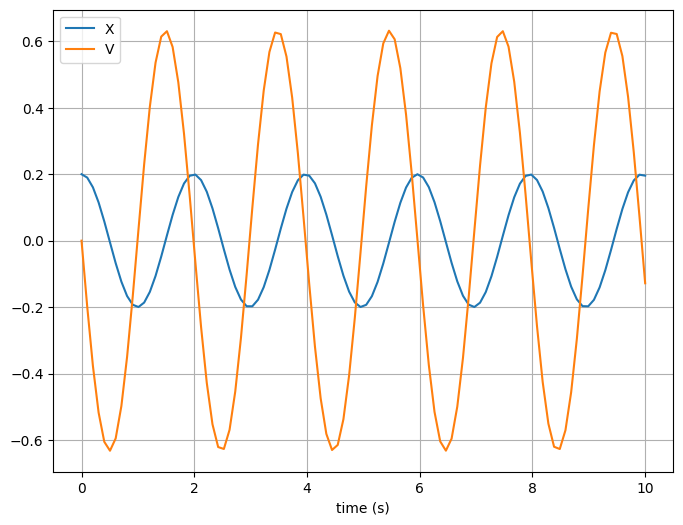

In [47]:
# Now let's plot it
plt.figure(figsize=[8,6])

# extract positions and velocities from the solution
rk_xs = rk_soln[:, 0]
rk_vs = rk_soln[:, 1]

plt.plot(ts, rk_xs, label='X')
plt.plot(ts, rk_vs, label='V')

plt.xlabel('time (s)')
plt.grid()
plt.legend(loc="upper left")
plt.show()

plt.close()

# Exercise: Implement/improve simple summation method using conservation of energy to ensure that the amplitude of oscillations does not grow